In [2]:
def ddxdtt(x, dxdt, mu):
    return mu * (1 - x**2) * dxdt - x

In [3]:
ddxdtt(1, 1, 1)

-1

In [4]:
def dudt(u, mu):
    x, dxdt = u
    dudt = array([dxdt, ddxdtt(x, dxdt, mu)])
    return dudt

In [5]:
dudt([1,1], 1)

array([ 1, -1])

In [6]:
from scipy.integrate import odeint

def run(u, mu, nsteps):
    x = empty(nsteps)
    for i in range(nsteps):
        u = odeint(lambda u,t : dudt(u, mu), u, [0, 0.01])[1]
        x[i] = u[0]
    return u, x

In [7]:
u, x = run([1, 1], 1, 5000)

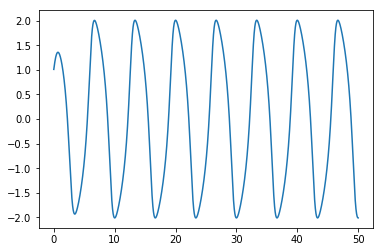

In [8]:
%matplotlib inline
plot(0.01 * arange(x.size), x)

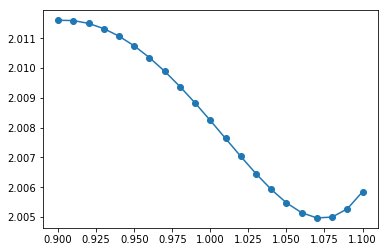

In [9]:
mu_array = linspace(0.9, 1.1, 21)
x2_mean = empty(mu_array.size)
for i, mu in enumerate(mu_array):
    _, x = run([1, 1], mu, 5000)
    x2_mean[i] = (x**2).mean()
plot(mu_array, x2_mean, 'o-')

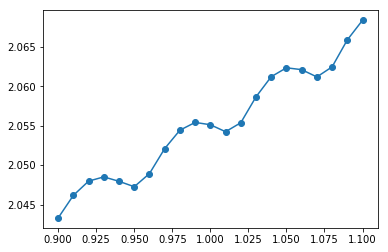

In [10]:
mu_array = linspace(0.9, 1.1, 21)
x2_mean = empty(mu_array.size)
for i, mu in enumerate(mu_array):
    _, x = run([1, 1], mu, 50000)
    x2_mean[i] = (x**2).mean()
plot(mu_array, x2_mean, 'o-')

In [11]:
import sys
sys.path.append("/home/niangxiu/Working/fds/")
from fds import shadowing

In [12]:
from fds import shadowing

def run_x2(u0, mu, nsteps):
    u, x = run(u0, mu, nsteps)
    return u, x**2

J, G = shadowing(run_x2, [1,1], 1, 1, 10, 500, 500)

[ 0.25959331]
[ 0.18153859]
[ 0.15452407]
[ 0.13146757]
[ 0.12776944]
[ 0.11931774]
[ 0.1197062]
[ 0.11525347]
[ 0.11644204]
[ 0.11355229]


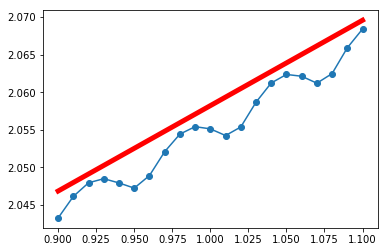

In [13]:
plot(mu_array, x2_mean, 'o-')
plot([0.9, 1.1], [J-0.1*G, J+0.1*G], '-r', lw=5)